# Lesson Note: Aggregating Time-Series Data
This lesson explores how to aggregate time-series data using Pandas, a powerful data manipulation library in Python. We'll use a time-series dataset from the statsmodels library to demonstrate key techniques including resampling, grouping, and summarizing time-series data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the CO2 dataset
data = sm.datasets.co2.load_pandas()
co2 = data.data
co2.head()


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


## Initial Data Exploration

In [2]:
print(co2.head())
print(co2.index)


              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')


## Resampling Time-Series Data
Resampling is a powerful method to restructure the time-series data into a different time frame. This can be used to summarize or aggregate the data at specified intervals.

Monthly to Yearly Resampling
Convert the monthly CO2 data to yearly averages.

In [3]:
# Resampling the data yearly and computing the mean
yearly_co2 = co2.resample('A').mean()
print(yearly_co2.head())


                   co2
1958-12-31  315.420000
1959-12-31  315.906250
1960-12-31  316.860377
1961-12-31  317.592308
1962-12-31  318.545833


C:\Users\abu aisha\AppData\Local\Temp\ipykernel_26604\3987856022.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_co2 = co2.resample('A').mean()


## Aggregation Functions
After resampling, you can apply various aggregation functions to summarize the data. Common aggregations include mean, sum, maximum, and minimum.

In [4]:
# Using different aggregation methods after resampling
yearly_co2_sum = co2.resample('A').sum()  # Sum of values every year
yearly_co2_max = co2.resample('A').max()  # Maximum value every year
yearly_co2_min = co2.resample('A').min()  # Minimum value every year

print("Yearly Sum:\n", yearly_co2_sum.head())
print("Yearly Max:\n", yearly_co2_max.head())
print("Yearly Min:\n", yearly_co2_min.head())


Yearly Sum:
                 co2
1958-12-31   7885.5
1959-12-31  15163.5
1960-12-31  16793.6
1961-12-31  16514.8
1962-12-31  15290.2
Yearly Max:
               co2
1958-12-31  317.9
1959-12-31  318.7
1960-12-31  320.0
1961-12-31  320.6
1962-12-31  321.1
Yearly Min:
               co2
1958-12-31  313.0
1959-12-31  313.0
1960-12-31  313.3
1961-12-31  314.5
1962-12-31  315.1


C:\Users\abu aisha\AppData\Local\Temp\ipykernel_26604\2231697196.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_co2_sum = co2.resample('A').sum()  # Sum of values every year
C:\Users\abu aisha\AppData\Local\Temp\ipykernel_26604\2231697196.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_co2_max = co2.resample('A').max()  # Maximum value every year
C:\Users\abu aisha\AppData\Local\Temp\ipykernel_26604\2231697196.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_co2_min = co2.resample('A').min()  # Minimum value every year


## Custom Aggregations
For more complex scenarios, you might want to apply multiple or custom aggregation functions.

In [5]:
# Applying multiple aggregation functions at once
yearly_co2_stats = co2.resample('A').agg(['mean', 'std', 'min', 'max'])
print(yearly_co2_stats.head())


                   co2                        
                  mean       std    min    max
1958-12-31  315.420000  1.467424  313.0  317.9
1959-12-31  315.906250  1.617643  313.0  318.7
1960-12-31  316.860377  1.984395  313.3  320.0
1961-12-31  317.592308  1.736782  314.5  320.6
1962-12-31  318.545833  1.810014  315.1  321.1


C:\Users\abu aisha\AppData\Local\Temp\ipykernel_26604\2081947995.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_co2_stats = co2.resample('A').agg(['mean', 'std', 'min', 'max'])


## Visualization
Visualizing time-series data can help understand trends, seasonality, and outliers.

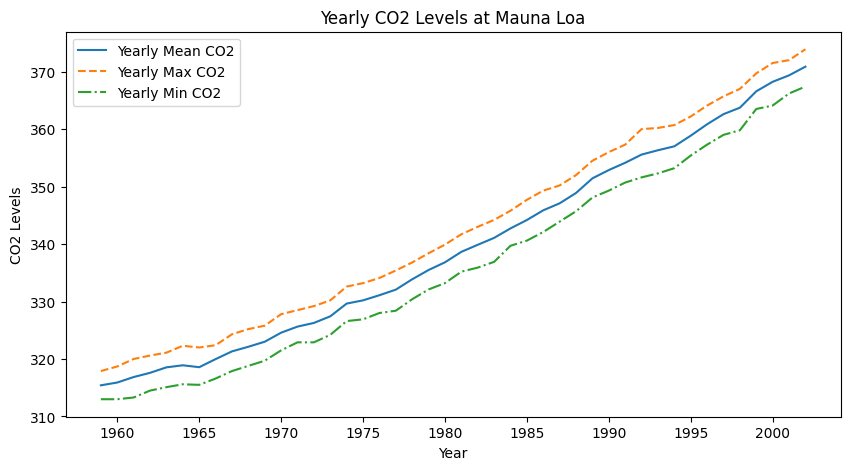

In [6]:
# Plotting the resampled data
plt.figure(figsize=(10, 5))
plt.plot(yearly_co2, label='Yearly Mean CO2')
plt.plot(yearly_co2_max, label='Yearly Max CO2', linestyle='--')
plt.plot(yearly_co2_min, label='Yearly Min CO2', linestyle='-.')
plt.title('Yearly CO2 Levels at Mauna Loa')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()
